# Tutorial 10: Risk Parity Portfolio Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9692%,0.0179%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6059%,-2.5393%,...,-2.2066%,-3.0310%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1098%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1692%,-1.6851%,-1.0216%,0.0914%,-1.1791%,0.5674%,0.5288%,0.6617%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1451%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5018%,0.0000%,0.0000%,8.4807%,0.0000%,3.8194%,0.0000%,0.0000%,...,10.8263%,0.0000%,0.0000%,0.0000%,0.0000%,7.1805%,0.0000%,0.0000%,4.2739%,0.0000%


### 2.2 Plotting portfolio composition

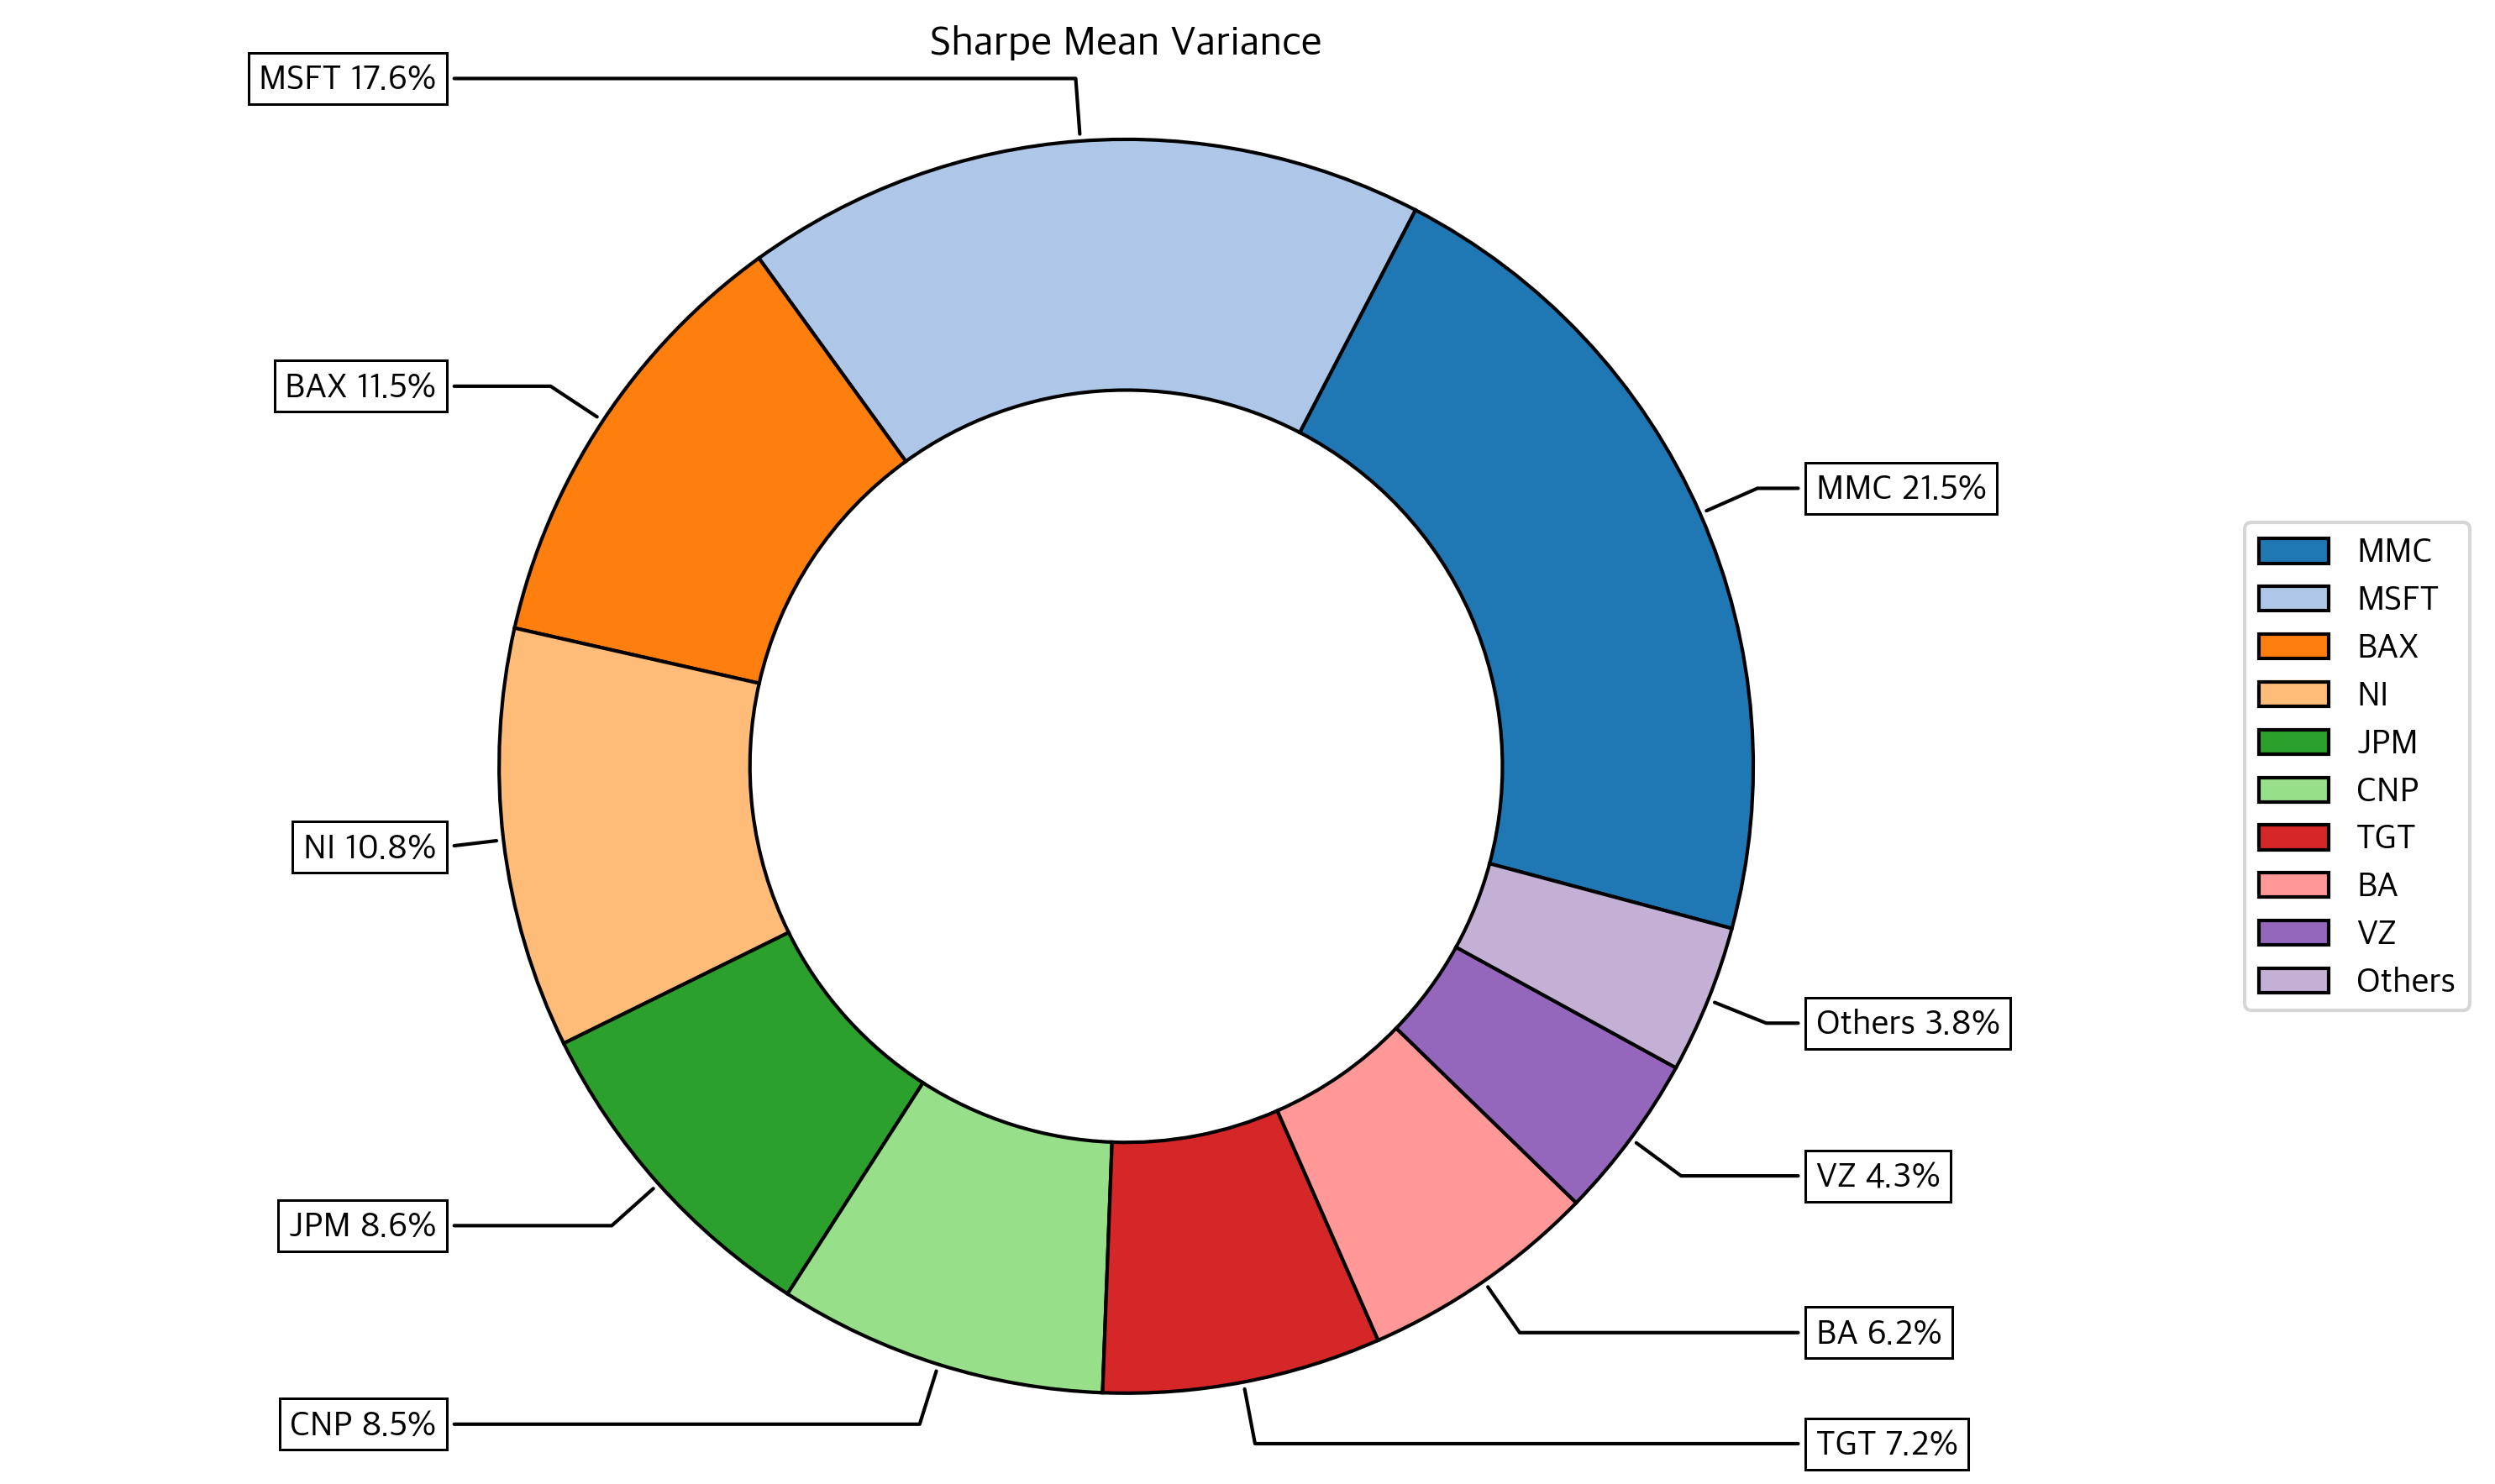

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Plotting Risk Composition

이 코드는 Riskfolio 라이브러리의 `plot_risk_con` 함수를 사용하여 포트폴리오의 리스크 기여도(Risk Contribution)를 시각화하는 과정을 보여줍니다. 이 함수는 각 자산이 포트폴리오 전체 리스크에 얼마나 기여하는지를 시각적으로 나타내는 그래프를 생성합니다. 각 파라미터의 역할을 자세히 설명하겠습니다.

### 코드 설명

1. **함수 호출**
   ```python
   ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                         color="tab:blue", height=6, width=10, ax=None)
   ```
   - `rp.plot_risk_con` 함수는 포트폴리오의 리스크 기여도를 시각화합니다.
   - 이 함수는 막대 그래프 형태로 각 자산의 기여도를 보여줍니다.

2. **파라미터 설명**

   - `w_rp`: 포트폴리오의 자산 가중치 벡터입니다.
     - 예: `w_rp = port.optimization(...)`에서 계산된 가중치.

   - `cov`: 자산 수익률의 공분산 행렬입니다.
     - 예: `port.cov`.

   - `returns`: 자산 수익률 데이터입니다.
     - 예: `port.returns`.

   - `rm`: 리스크 측정 방법입니다. 사용 가능한 방법에는 'MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'CDaR', 'UCI', 'EDaR' 등이 있습니다.
     - 예: `rm = 'MV'` (분산을 리스크 측정 방법으로 사용).

   - `rf`: 무위험 이자율입니다. 일반적으로 0으로 설정됩니다.
     - 예: `rf = 0`.

   - `alpha`: CVaR과 같은 리스크 측정 방법에서 사용하는 신뢰 수준입니다. 예를 들어, `alpha = 0.01`은 99% 신뢰 수준을 의미합니다.
     - 예: `alpha = 0.01`.

   - `color`: 그래프의 막대 색상을 지정합니다.
     - 예: `color = "tab:blue"` (파란색 막대).

   - `height`: 그래프의 높이를 지정합니다.
     - 예: `height = 6`.

   - `width`: 그래프의 너비를 지정합니다.
     - 예: `width = 10`.

   - `ax`: 기존의 Matplotlib 축 객체입니다. 그래프를 그릴 특정 축을 지정할 수 있습니다. 기본값은 `None`이며, 새로운 축을 생성합니다.
     - 예: `ax = None`.

3. **결과 반환**
   - `ax`: 생성된 Matplotlib 축 객체를 반환합니다. 이 객체를 사용하여 그래프를 추가로 수정하거나 다른 그래프와 결합할 수 있습니다.

### 예시

```python
import matplotlib.pyplot as plt
import riskfolio as rp

# 포트폴리오 객체 생성 및 최적화 수행 (예제 데이터 사용)
Y = ...  # 자산 수익률 데이터
port = rp.Portfolio(returns=Y)
port.assets_stats(method_mu='hist', method_cov='hist')
w_rp = port.optimization(model='Classic', rm='MV', obj='Sharpe', rf=0, l=0, hist=True)

# 리스크 기여도 시각화
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm='MV', rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

plt.show()
```

### 요약

- **`rp.plot_risk_con` 함수**: 포트폴리오의 각 자산이 전체 리스크에 기여하는 정도를 시각화하는 함수입니다.
- **주요 파라미터**:
  - `w_rp`: 자산 가중치 벡터
  - `cov`: 공분산 행렬
  - `returns`: 자산 수익률 데이터
  - `rm`: 리스크 측정 방법
  - `rf`: 무위험 이자율
  - `alpha`: 신뢰 수준
  - `color`: 그래프 색상
  - `height`, `width`: 그래프 크기
  - `ax`: Matplotlib 축 객체

이 코드를 통해 포트폴리오의 리스크 기여도를 시각적으로 분석하고, 각 자산이 포트폴리오 리스크에 얼마나 기여하는지 이해할 수 있습니다.

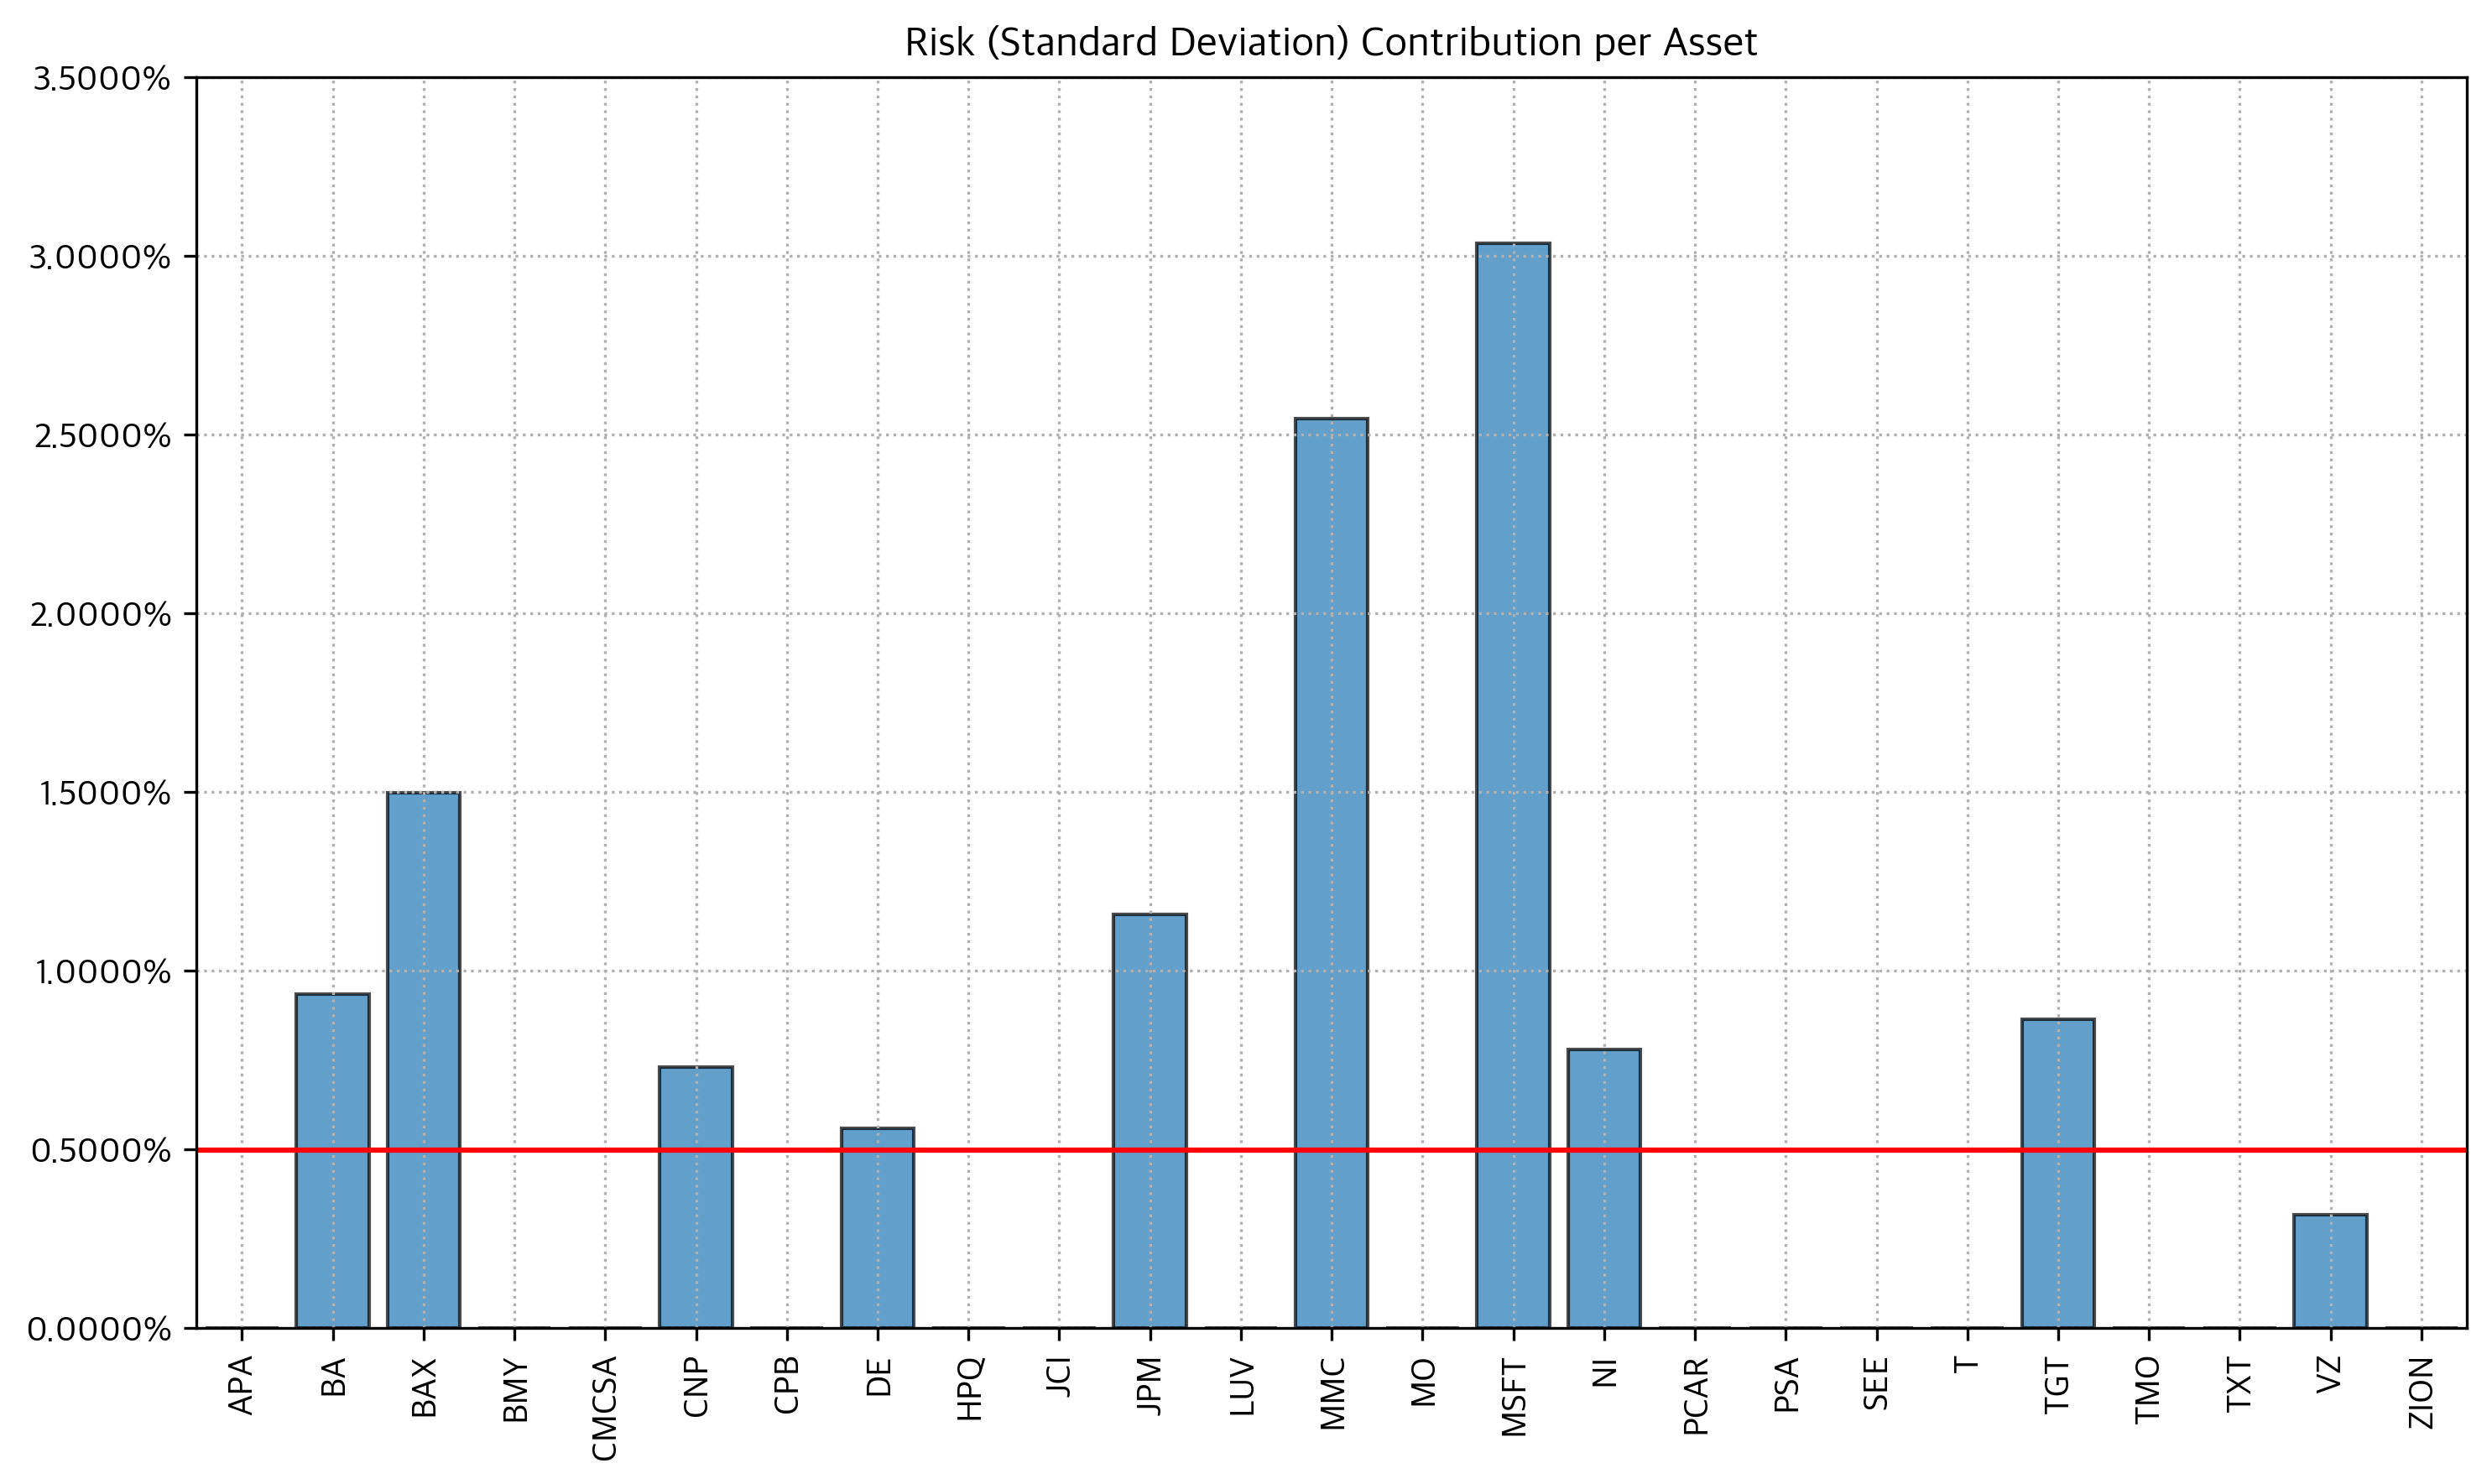

In [5]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

## 3. Estimating Risk Parity Portfolios for Other Risk Measures


이 부분에서는 리스크 패리티 포트폴리오를 계산할 것입니다. 먼저 분산을 리스크 측정 방법으로 사용할 때 리스크 패리티 포트폴리오를 계산한 후, 사용 가능한 모든 리스크 측정 방법에 대해 리스크 패리티 포트폴리오를 계산할 것입니다.

### 3.1 Calculating the risk parity portfolio for variance.

이 코드는 Riskfolio 라이브러리를 사용하여 리스크 패리티(Risk Parity) 최적화를 수행하는 과정을 보여줍니다. 리스크 패리티 최적화는 각 자산의 리스크 기여도를 균등하게 하는 포트폴리오를 구성하는 방법입니다. 각 파라미터의 역할을 자세히 설명하겠습니다.

### 코드 설명

1. **리스크 기여도 제약 벡터 초기화**
   ```python
   b = None  # Risk contribution constraints vector
   ```
   - `b`는 리스크 기여도 제약 벡터입니다. 여기서는 `None`으로 설정되어 있어 제약이 없음을 의미합니다. 이 벡터를 설정하면 특정 자산 또는 자산 그룹의 리스크 기여도를 제한할 수 있습니다.

2. **리스크 패리티 최적화 수행**
   ```python
   w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)
   ```
   - `rp_optimization` 함수는 리스크 패리티 최적화를 수행하여 각 자산의 리스크 기여도가 균등하게 되도록 합니다.
   - `model`: 사용되는 최적화 모델을 지정합니다. 예를 들어, 'Classic', 'BL' (Black-Litterman), 'FM' (Factor Model) 등이 있습니다.
   - `rm`: 리스크 측정 방법을 지정합니다. 예를 들어, 'MV' (Variance), 'CVaR' (Conditional Value at Risk), 'MAD' (Mean Absolute Deviation) 등이 있습니다.
   - `rf`: 무위험 이자율을 지정합니다. 일반적으로 0으로 설정됩니다.
   - `b`: 리스크 기여도 제약 벡터입니다. 여기서는 `None`으로 설정되어 있습니다.
   - `hist`: 역사적 시나리오 사용 여부를 지정합니다. `True`로 설정하면 역사적 데이터를 사용하여 최적화를 수행합니다.

3. **최적 포트폴리오 가중치 출력**
   ```python
   display(w_rp.T)
   ```
   - `w_rp`: 리스크 패리티 최적화를 통해 계산된 포트폴리오의 자산 가중치 벡터입니다.
   - `display(w_rp.T)`: 계산된 자산 가중치를 출력합니다.

### 주요 파라미터 설명

- **`model`**: 최적화 모델
  - 'Classic': 역사적 데이터를 사용한 고전적인 최적화 모델
  - 'BL': Black-Litterman 모델
  - 'FM': Factor Model

- **`rm`**: 리스크 측정 방법
  - 'MV': Variance (분산)
  - 'MAD': Mean Absolute Deviation (평균 절대 편차)
  - 'MSV': Semi-Variance (반분산)
  - 'FLPM': First Lower Partial Moment (첫 번째 하측 부분 모멘트)
  - 'SLPM': Second Lower Partial Moment (두 번째 하측 부분 모멘트)
  - 'CVaR': Conditional Value at Risk (조건부 가치 위험)
  - 'EVaR': Entropic Value at Risk (엔트로피 가치 위험)
  - 'CDaR': Conditional Drawdown at Risk (조건부 최대 하락 위험)
  - 'UCI': Ulcer Index (궤양 지수)
  - 'EDaR': Entropic Drawdown at Risk (엔트로피 최대 하락 위험)

- **`rf`**: 무위험 이자율
  - 일반적으로 0으로 설정되며, 최적화 계산 시 사용됩니다.

- **`b`**: 리스크 기여도 제약 벡터
  - `None`으로 설정하면 제약 조건이 없음을 의미합니다. 특정 자산 또는 자산 그룹의 리스크 기여도를 제한하려면 이 벡터를 설정할 수 있습니다.

- **`hist`**: 역사적 시나리오 사용 여부
  - `True`로 설정하면 역사적 데이터를 사용하여 최적화를 수행합니다.

### 예시

```python
import pandas as pd
import riskfolio as rp

# 데이터 준비
Y = ...  # 자산 수익률 데이터
port = rp.Portfolio(returns=Y)
port.assets_stats(method_mu='hist', method_cov='hist')

# 리스크 패리티 최적화
model = 'Classic'
rm = 'MV'
rf = 0
b = None
hist = True

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

# 최적 포트폴리오 가중치 출력
display(w_rp.T)
```

### 요약

- **리스크 패리티 최적화**: 각 자산의 리스크 기여도가 균등하게 되도록 포트폴리오를 최적화합니다.
- **주요 파라미터**:
  - `model`: 최적화 모델
  - `rm`: 리스크 측정 방법
  - `rf`: 무위험 이자율
  - `b`: 리스크 기여도 제약 벡터
  - `hist`: 역사적 시나리오 사용 여부

이 과정을 통해 리스크 패리티 포트폴리오를 구성할 수 있으며, 각 자산의 리스크 기여도를 균등하게 하여 포트폴리오의 안정성을 높일 수 있습니다.

In [6]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5018%,0.0000%,0.0000%,8.4807%,0.0000%,3.8194%,0.0000%,0.0000%,...,10.8263%,0.0000%,0.0000%,0.0000%,0.0000%,7.1805%,0.0000%,0.0000%,4.2739%,0.0000%


### 3.2 Plotting portfolio composition

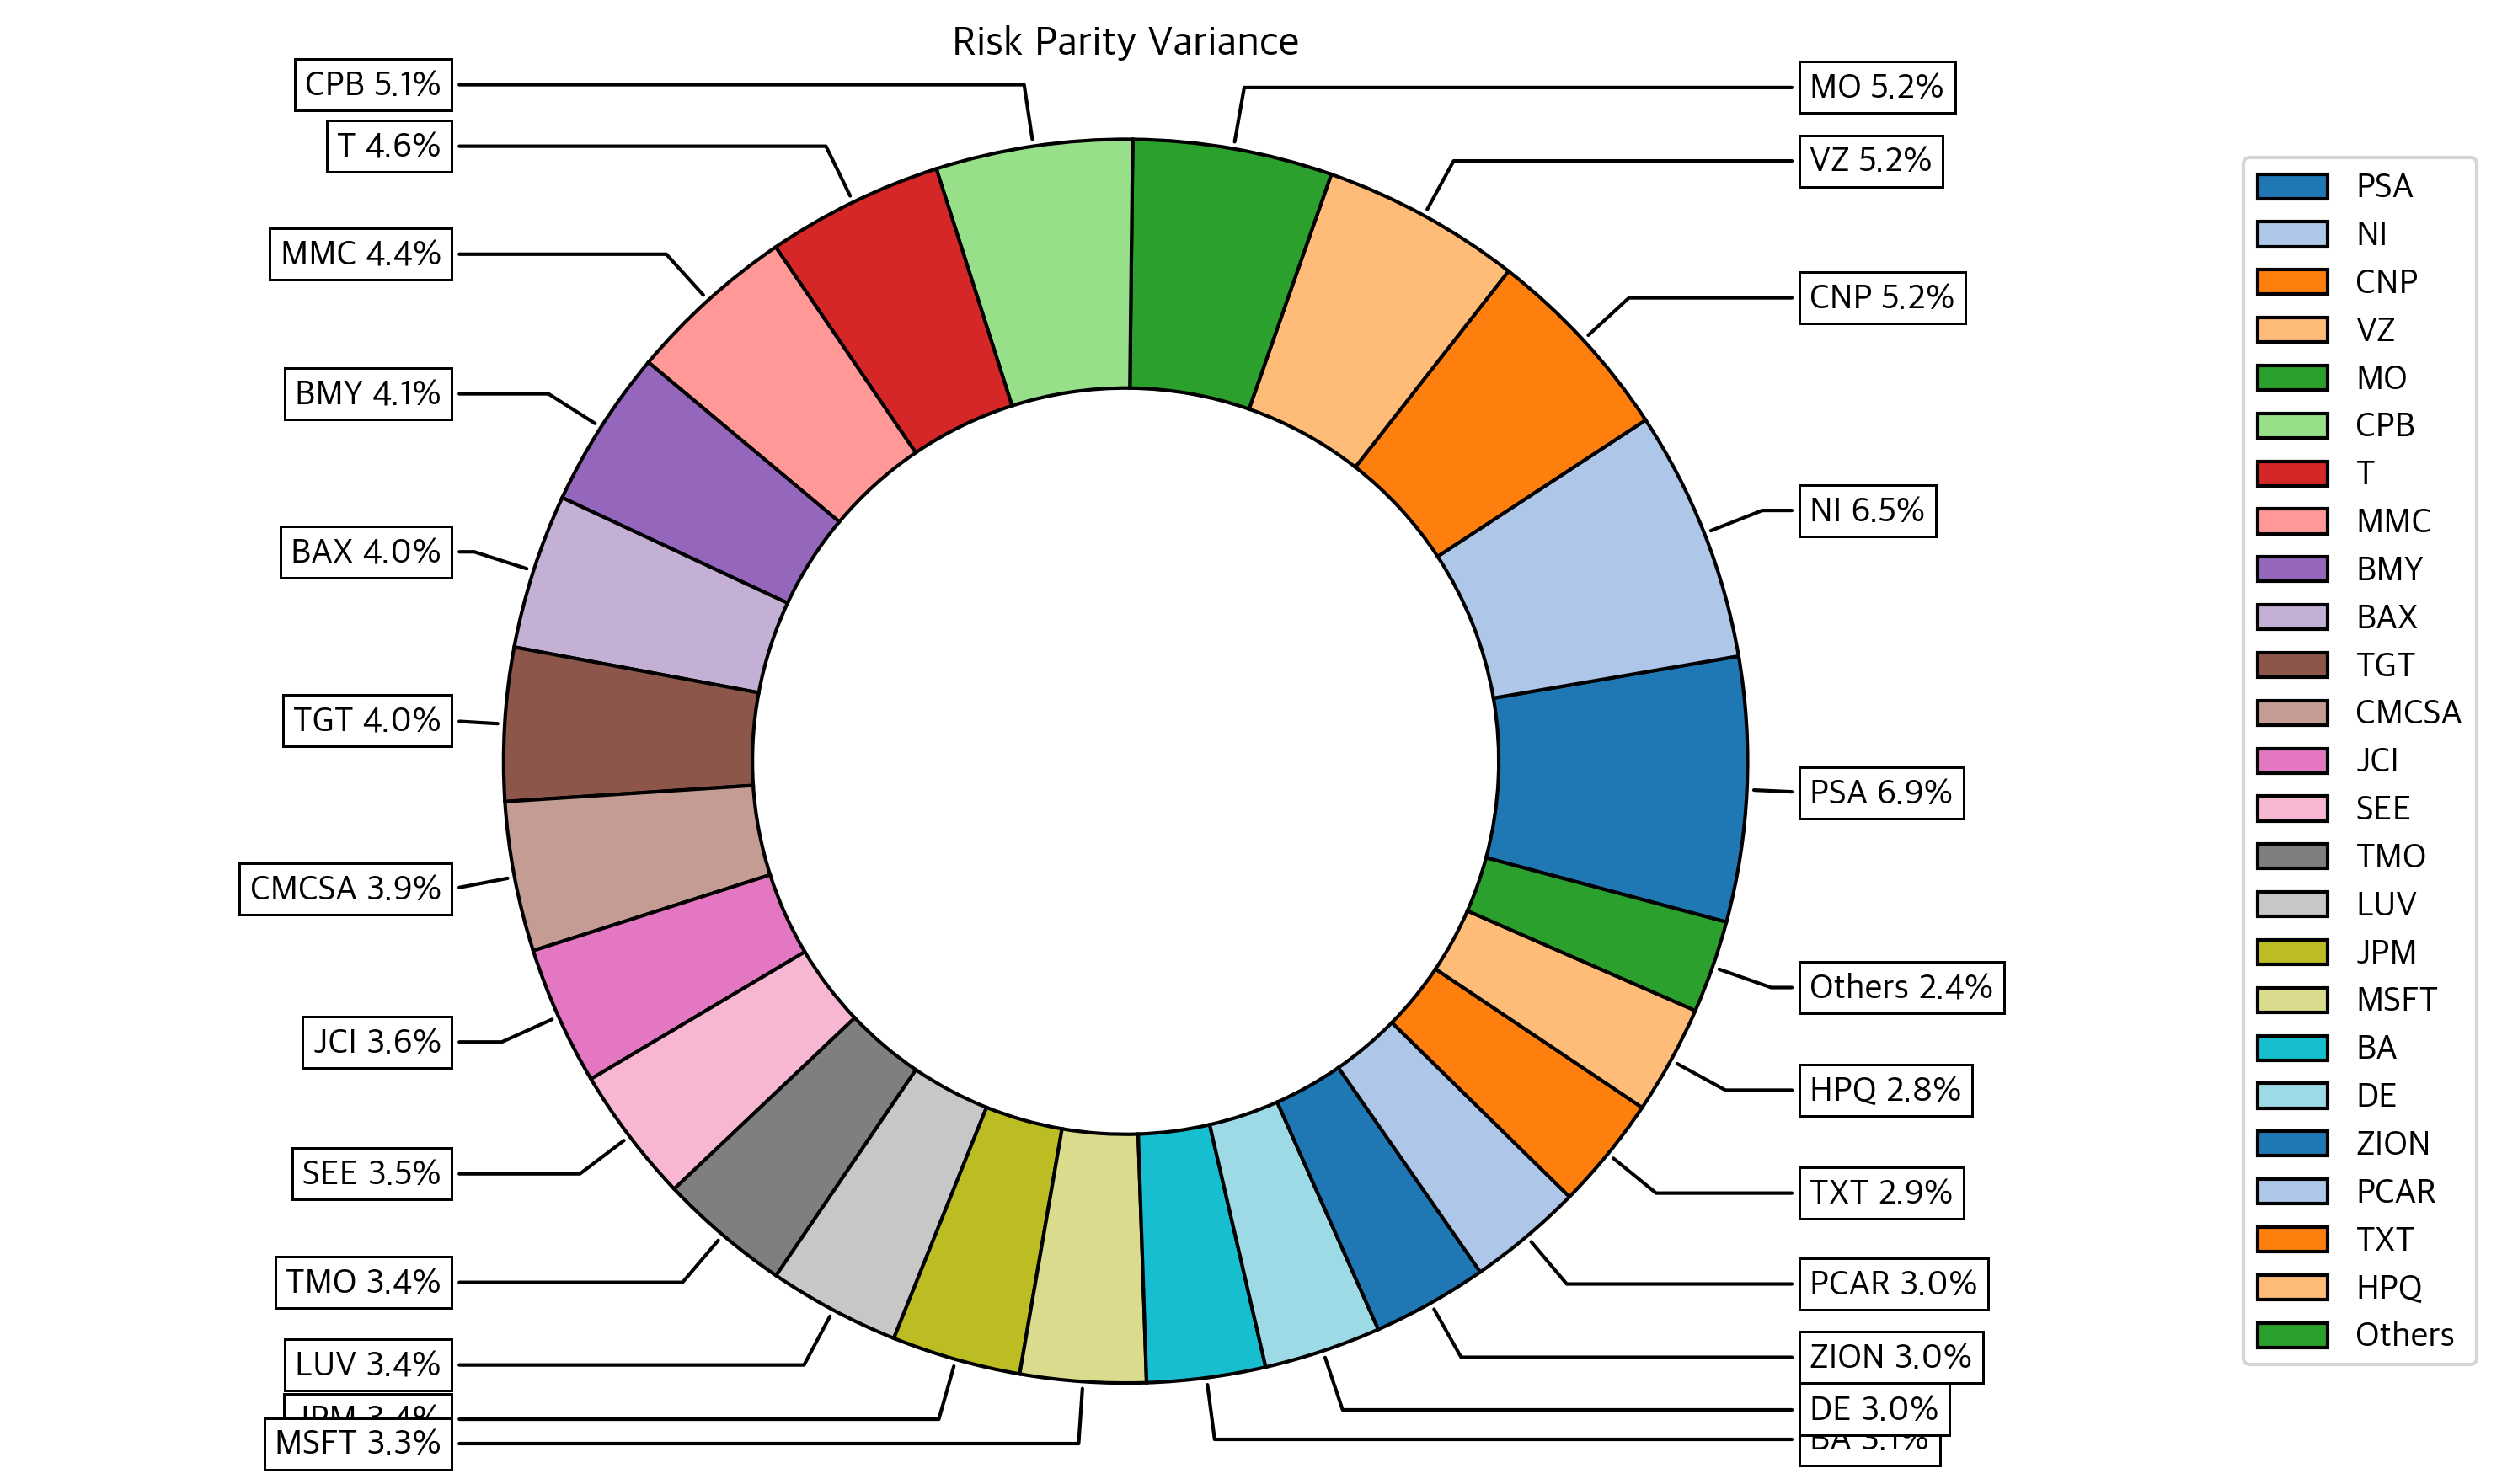

In [7]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Plotting Risk Composition

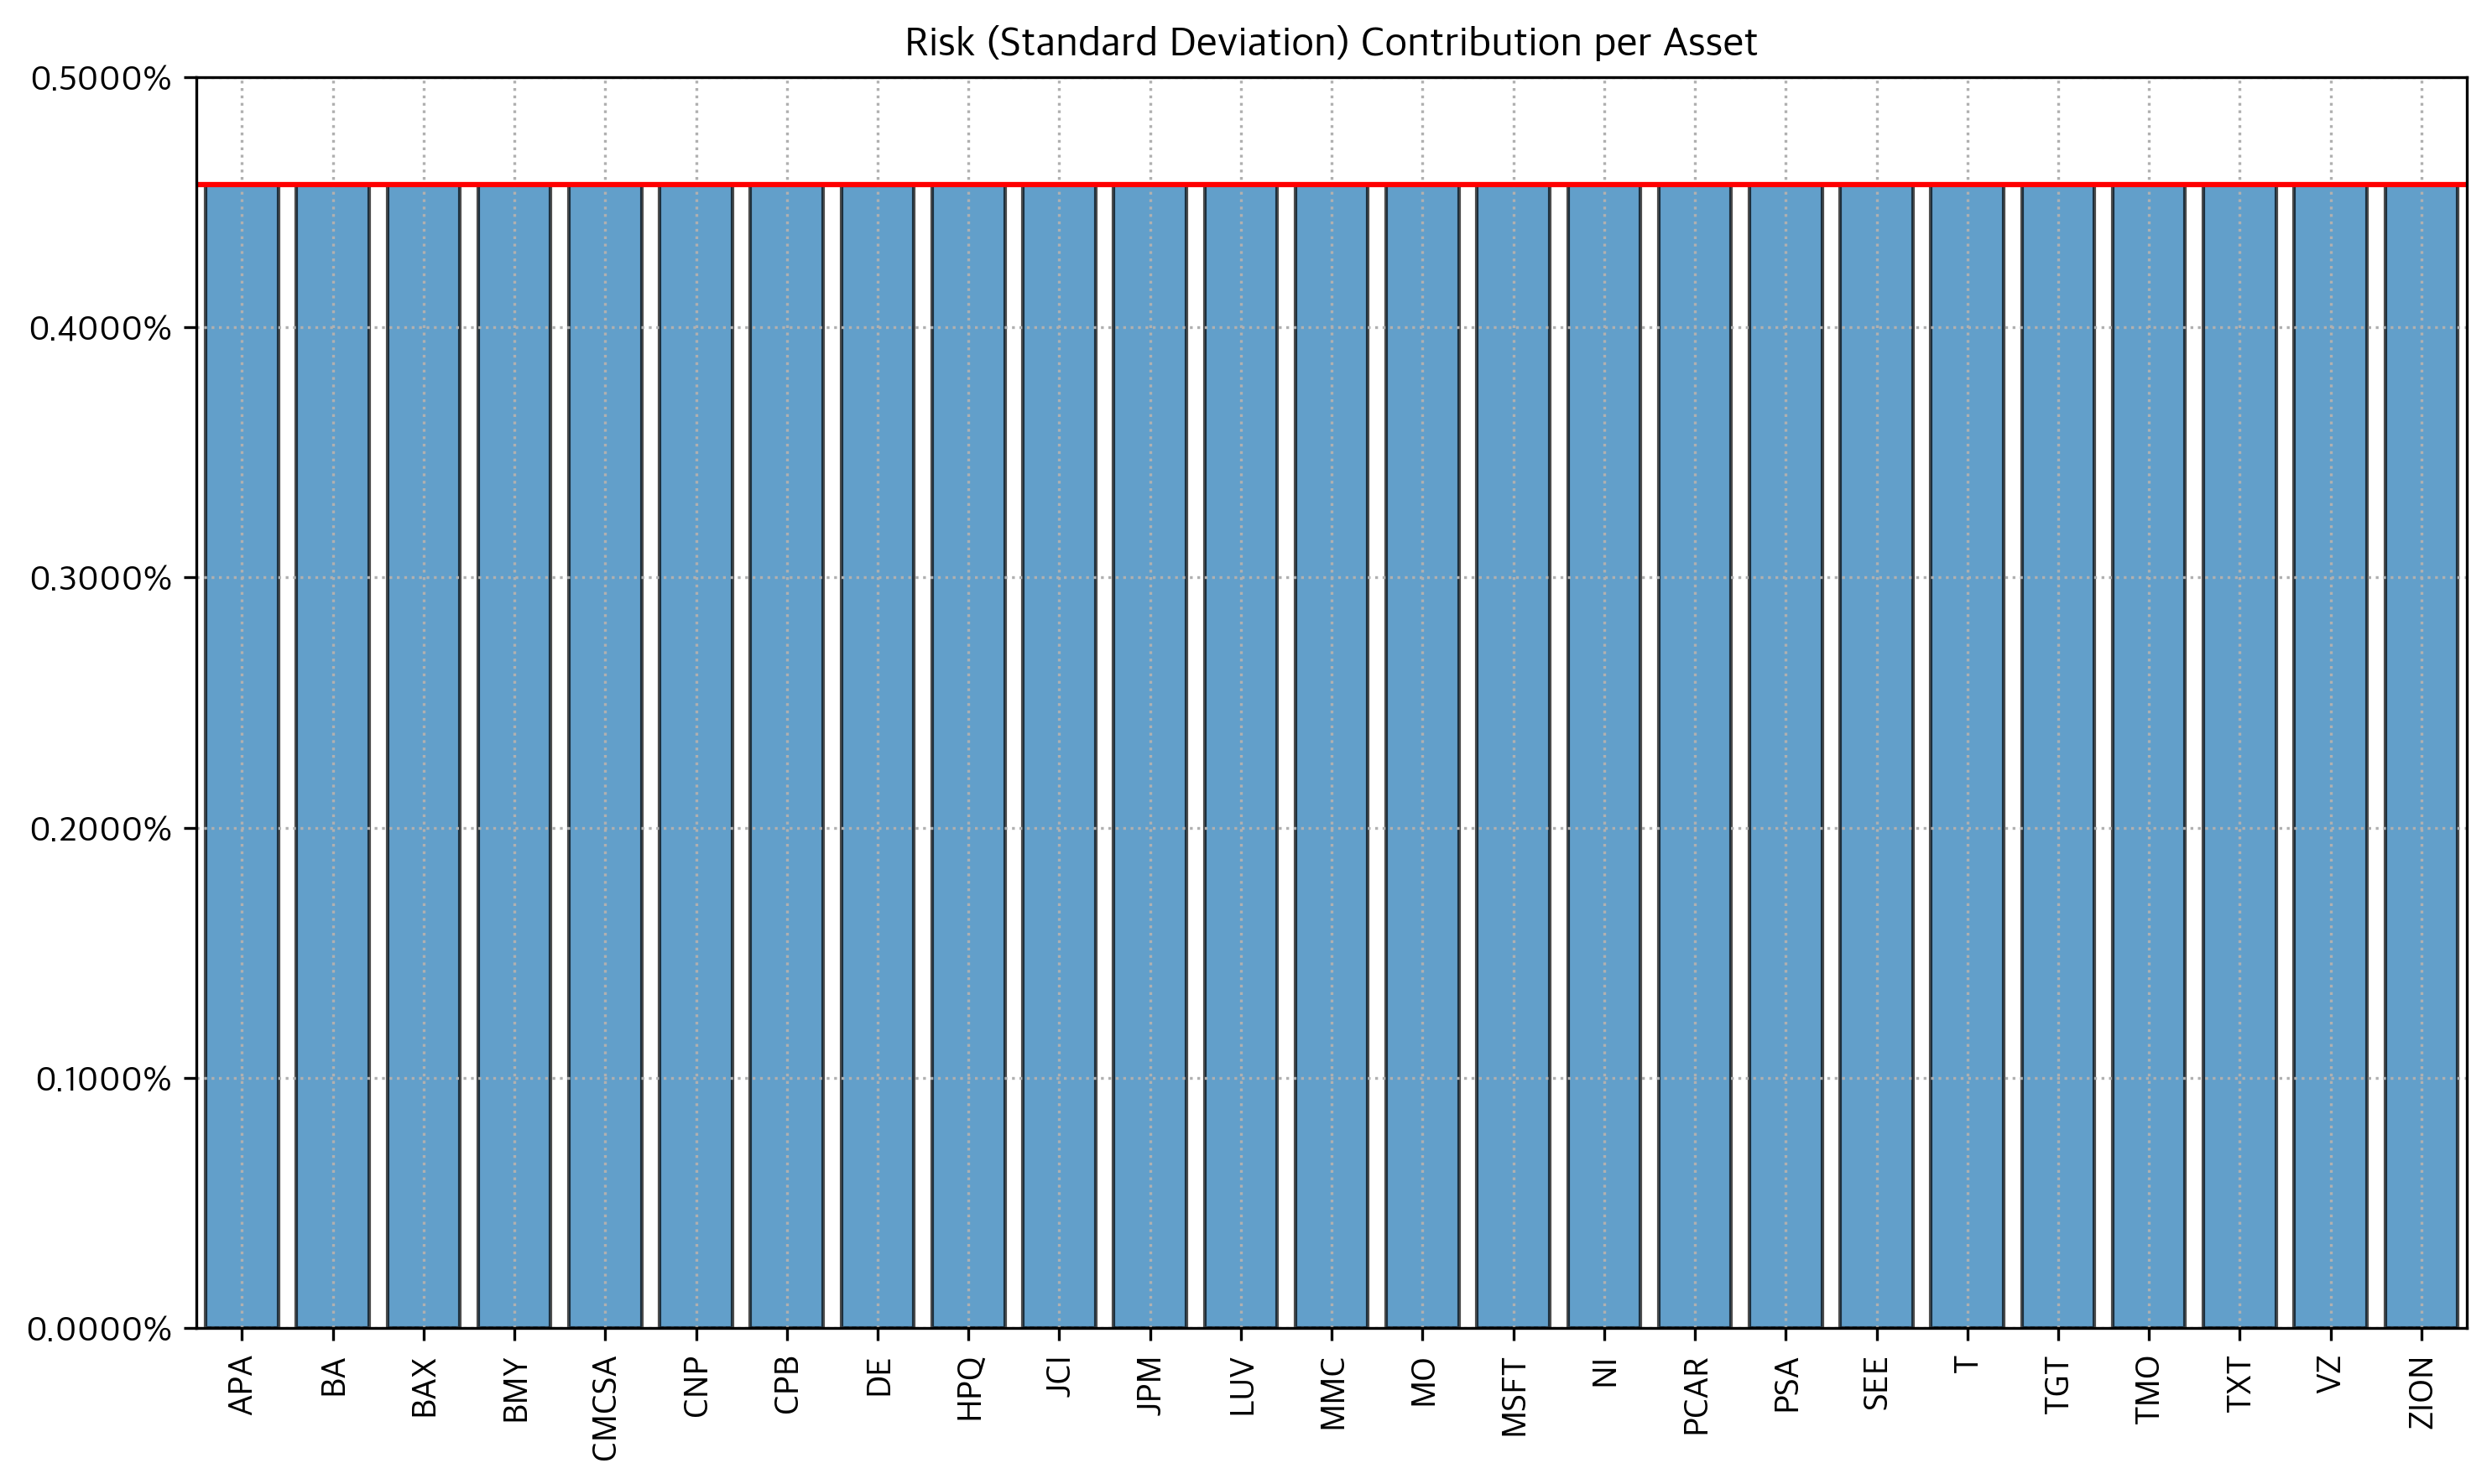

In [8]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [17]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])
port.solvers = ['SCS']  # 또는 'ECOS', 'OSQP', 'SCS' 등

for i in rms:
    w = port.rp_optimization(model=model, rm=i, rf=rf, b=b, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [13]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,CDaR,UCI,EDaR
APA,2.40%,2.20%,2.51%,2.03%,2.40%,2.45%,2.80%,1.16%,1.16%,1.05%
BA,3.08%,3.22%,2.99%,3.30%,3.04%,2.87%,2.76%,6.48%,6.10%,4.23%
BAX,4.03%,4.40%,3.93%,4.64%,4.02%,3.77%,3.49%,2.67%,3.41%,2.69%
BMY,4.12%,4.24%,4.19%,4.07%,4.07%,3.83%,4.67%,2.01%,1.59%,2.24%
CMCSA,3.89%,4.01%,3.89%,3.86%,3.90%,3.72%,3.52%,2.66%,2.52%,3.59%
CNP,5.20%,5.06%,5.22%,5.11%,5.34%,5.63%,5.50%,7.25%,5.67%,9.14%
CPB,5.10%,4.54%,5.69%,4.49%,5.66%,6.94%,7.73%,2.83%,2.51%,2.64%
DE,3.04%,3.02%,2.91%,3.08%,2.94%,2.79%,2.95%,5.21%,5.33%,7.12%
HPQ,2.83%,2.95%,2.64%,2.91%,2.62%,2.36%,2.69%,2.57%,2.57%,2.43%
JCI,3.61%,3.51%,3.60%,3.50%,3.58%,3.37%,3.27%,1.90%,2.03%,1.97%


<Axes: >

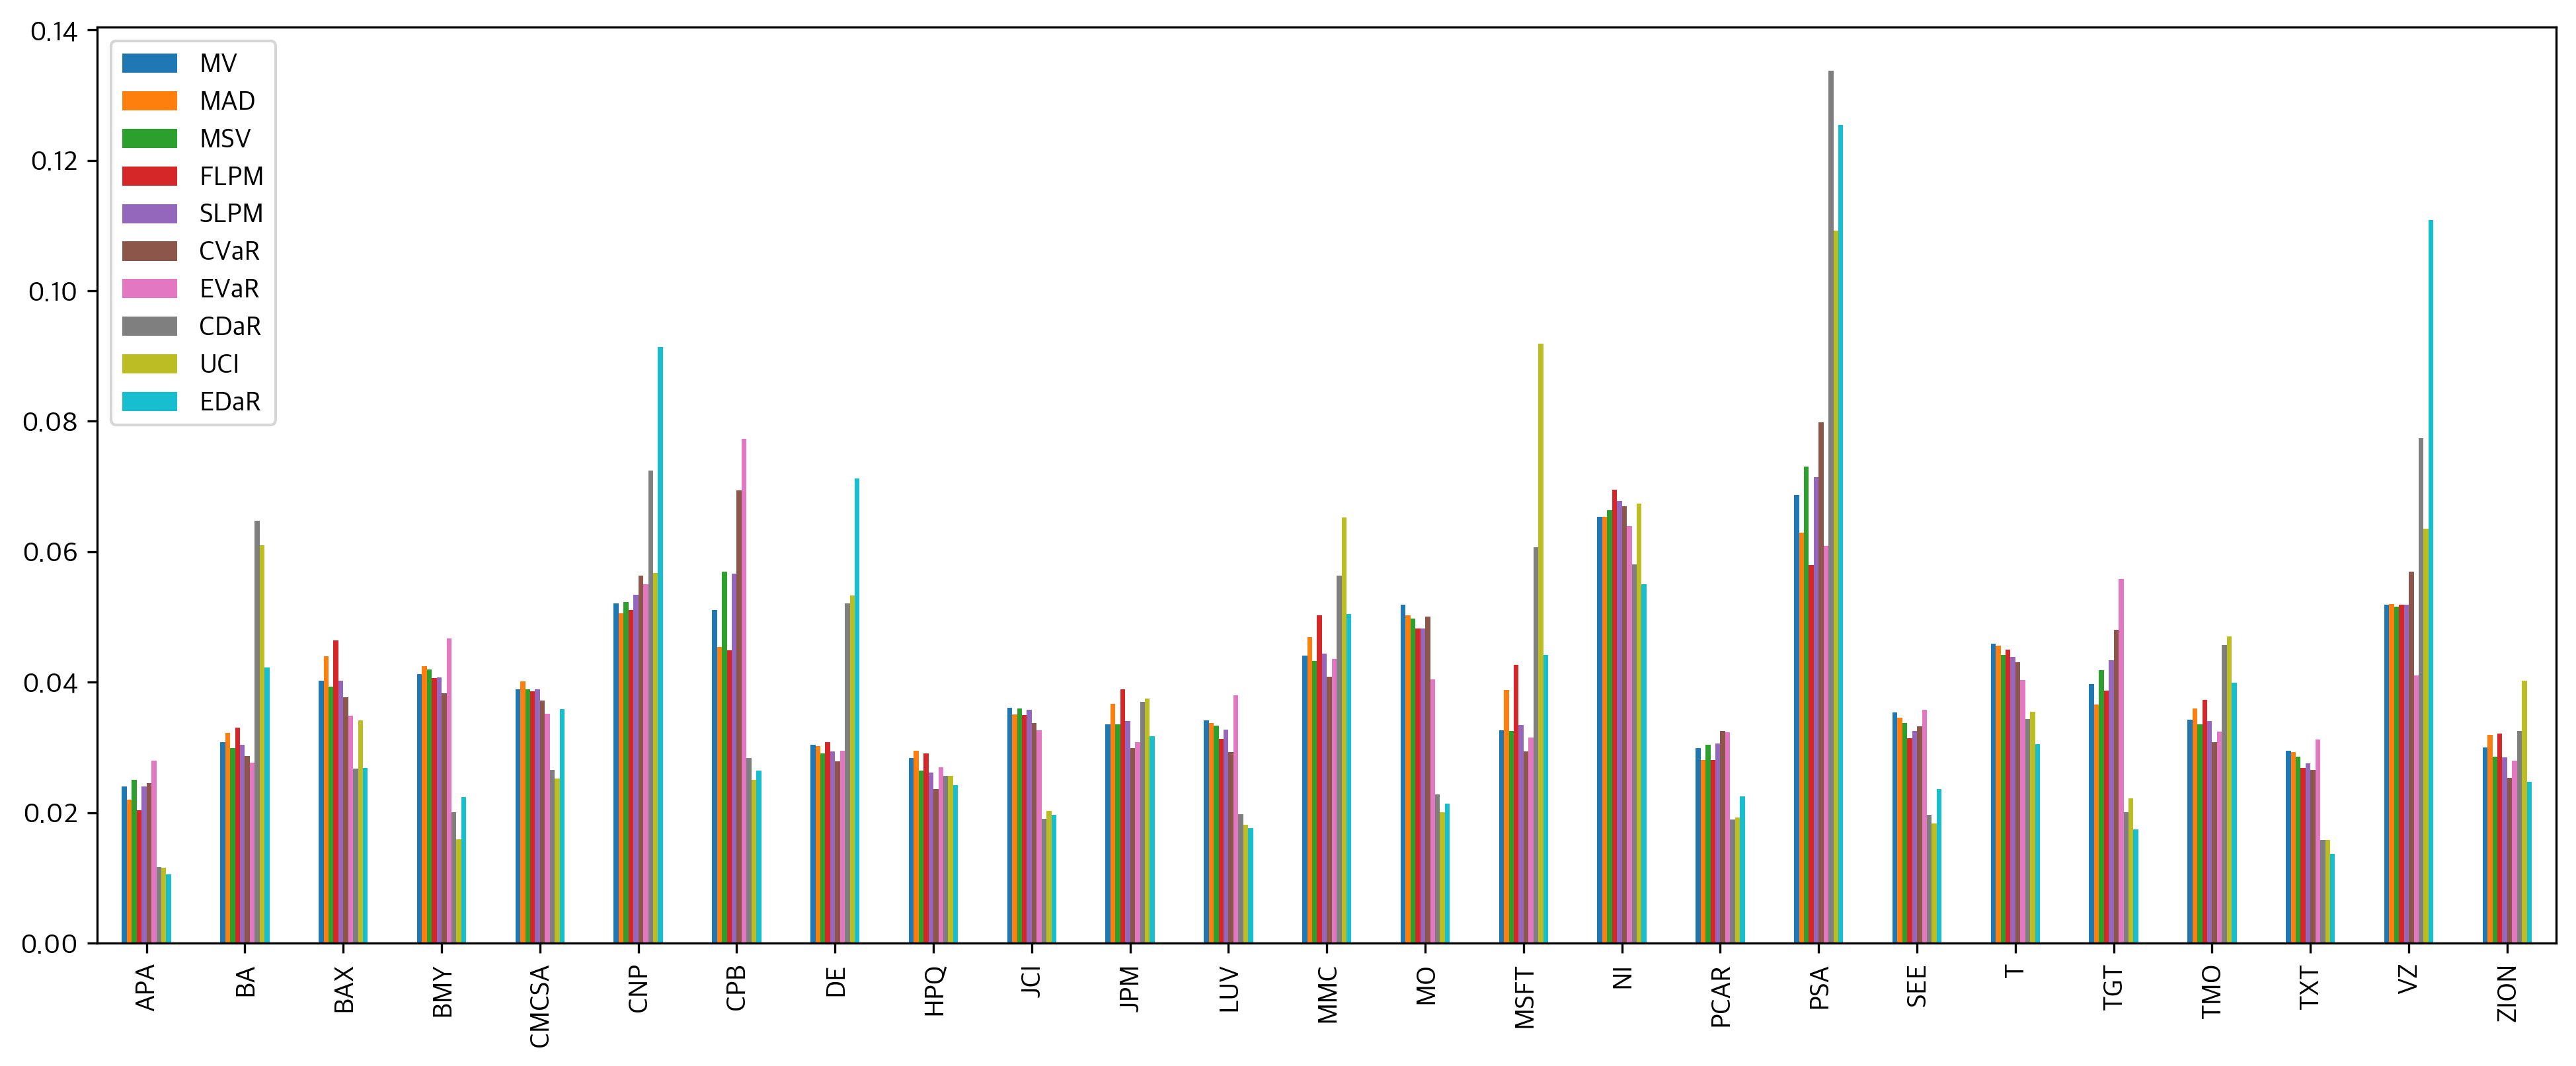

In [14]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(16)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)